In [18]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [19]:
import cv2
import os
from tqdm import tqdm 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
def loading_the_data(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)

    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            
            filepaths.append(fpath)
            labels.append(fold)

    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')

    df = pd.concat([Fseries, Lseries], axis=1)
    
    return df

In [23]:
data_dir = r'C:\Users\muzza\OneDrive\Desktop\Christ\DL\data\train'
train_df = loading_the_data(data_dir)

train_df

,filepaths,labels
0,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,benign
1,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,benign
2,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,benign
3,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,benign
4,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,benign
...,...,...
2632,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,malignant
2633,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,malignant
2634,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,malignant
2635,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,malignant


In [24]:
data_dir = r'C:\Users\muzza\OneDrive\Desktop\Christ\DL\data\test'
ts_df = loading_the_data(data_dir)

ts_df

,filepaths,labels
0,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,benign
1,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,benign
2,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,benign
3,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,benign
4,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,benign
...,...,...
655,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,malignant
656,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,malignant
657,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,malignant
658,C:\Users\muzza\OneDrive\Desktop\Christ\DL\data...,malignant


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [27]:

def create_datagen():
    train_datagen = ImageDataGenerator(
        rescale=1./255,  
        rotation_range=20,  
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        shear_range=0.2, 
        zoom_range=0.2, 
        horizontal_flip=True, 
        fill_mode='nearest'  
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    return train_datagen, test_datagen

def load_data_with_generator(train_dir, test_dir, img_size=64, batch_size=32):
    train_datagen, test_datagen = create_datagen()

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary' 
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary' 
    )

    return train_generator, test_generator

train_dir = r'C:\Users\muzza\OneDrive\Desktop\Christ\DL\data\train'
test_dir = r'C:\Users\muzza\OneDrive\Desktop\Christ\DL\data\test'

train_generator, test_generator = load_data_with_generator(train_dir, test_dir)


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


#Custom Cnn Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_skin_cancer_model(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    return model

input_shape = (64, 64, 3) 
skin_cancer_model = create_skin_cancer_model(input_shape)

skin_cancer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

skin_cancer_model.summary()


c:\Users\muzza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,176,385 (4.49 MB)

 Trainable params: 1,176,385 (4.49 MB)

 Non-trainable params: 0 (0.00 B)

testing the model

In [29]:
history_custom_cnn = skin_cancer_model.fit(
    train_generator, 
    validation_data=test_generator, 
    epochs=10,  
    batch_size=32
)


Epoch 1/10


c:\Users\muzza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 46s 473ms/step - accuracy: 0.5970 - loss: 0.6467 - val_accuracy: 0.7773 - val_loss: 0.4597
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.7419 - loss: 0.5078 - val_accuracy: 0.7848 - val_loss: 0.4271
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.7642 - loss: 0.4717 - val_accuracy: 0.7879 - val_loss: 0.4088
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - accuracy: 0.7754 - loss: 0.4470 - val_accuracy: 0.7773 - val_loss: 0.4393
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.7888 - loss: 0.4553 - val_accuracy: 0.7894 - val_loss: 0.4133
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.7798 - loss: 0.4290 - val_accuracy: 0.7848 - val_loss: 0.4243
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 209ms/step - accuracy: 0.7594 - loss: 0.4599 - val_accuracy: 0.7985 - val_loss: 0.3798
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 297ms/step - accuracy: 0.8056 - loss: 0.4017 - val_accuracy: 0.795

In [30]:
test_loss, test_accuracy = skin_cancer_model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8037 - loss: 0.3591
Test Accuracy: 0.7909091114997864
Test Loss: 0.3811948001384735


visualization of training and validation loss and accurqacy of the cnn model

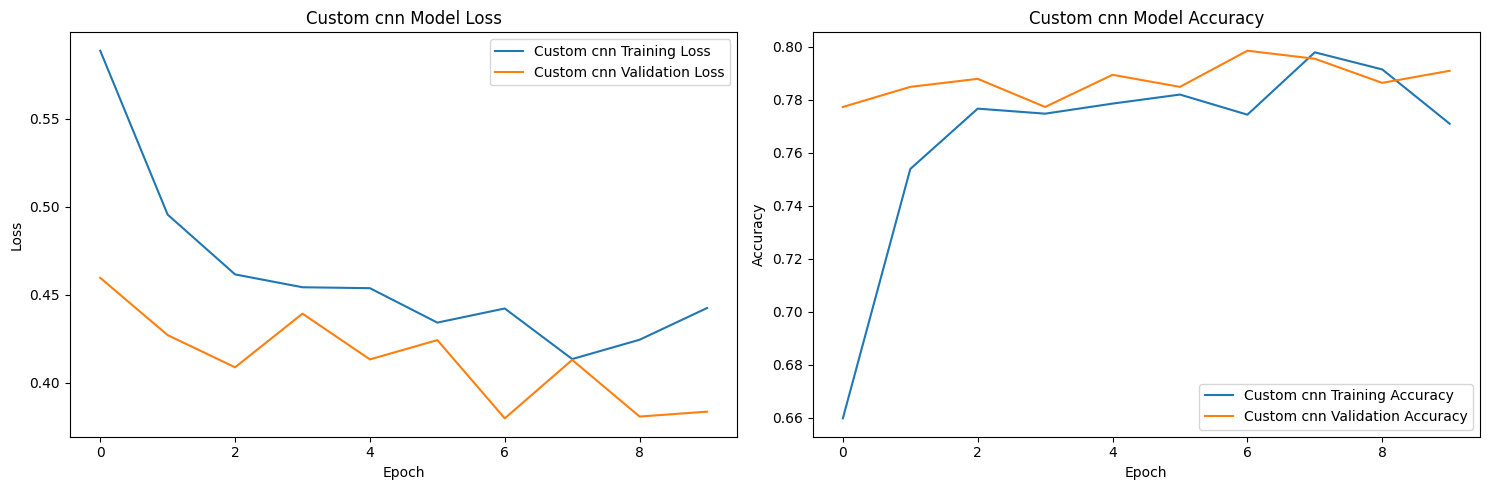

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_custom_cnn.history['loss'], label='Custom cnn Training Loss')
plt.plot(history_custom_cnn.history['val_loss'], label='Custom cnn Validation Loss')
plt.title('Custom cnn Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_custom_cnn.history['accuracy'], label='Custom cnn Training Accuracy')
plt.plot(history_custom_cnn.history['val_accuracy'], label='Custom cnn Validation Accuracy')
plt.title('Custom cnn Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


classification report and evaluation of the cnn model

In [54]:
from sklearn.metrics import classification_report

predictions = skin_cancer_model.predict(test_generator)

predicted_labels_cnn = (predictions > 0.5).astype(int)

true_labels_cnn = test_generator.labels

report = classification_report(true_labels_cnn, predicted_labels_cnn)
print(report)
fpr, tpr, thresholds = roc_curve(true_labels_cnn, predicted_labels_cnn)
roc_auc = auc(fpr, tpr)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
              precision    recall  f1-score   support

           0       0.55      0.39      0.45       360
           1       0.46      0.62      0.52       300

    accuracy                           0.49       660
   macro avg       0.50      0.50      0.49       660
weighted avg       0.51      0.49      0.49       660



#VGG-16 Model

i am using vgg16 model instead of vgg19 as it  is smaller and faster. also vgg16 requiers only less number of layers and hence less computational power.

In [39]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def build_vgg16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='sigmoid' if num_classes == 1 else 'softmax')
    ])

    return model

vgg16_model = build_vgg16_model((64, 64, 3), 1)

vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

vgg16_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

testing the vgg16 model that we built 

In [40]:
history = vgg16_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    batch_size=32
)

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 67s 757ms/step - accuracy: 0.6414 - loss: 0.7469 - val_accuracy: 0.7742 - val_loss: 0.4383
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 581ms/step - accuracy: 0.7774 - loss: 0.4685 - val_accuracy: 0.8076 - val_loss: 0.4106
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 595ms/step - accuracy: 0.7949 - loss: 0.4307 - val_accuracy: 0.8288 - val_loss: 0.3879
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 57s 678ms/step - accuracy: 0.8184 - loss: 0.3916 - val_accuracy: 0.8015 - val_loss: 0.3949
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 58s 685ms/step - accuracy: 0.8028 - loss: 0.4171 - val_accuracy: 0.8061 - val_loss: 0.3755
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 57s 680ms/step - accuracy: 0.8106 - loss: 0.4081 - val_accuracy: 0.8227 - val_loss: 0.3684
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 78s 935ms/step - accuracy: 0.8246 - loss: 0.3722 - val_accuracy: 0.8106 - val_loss: 0.3673
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.8278 - loss: 0.3710 - val_accurac

evaluating the model

In [41]:
test_loss, test_accuracy = vgg16_model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 661ms/step - accuracy: 0.8355 - loss: 0.3823
Test Accuracy: 0.831818163394928
Test Loss: 0.36238694190979004


printing the classification report for evlauting the model
also calculating the roc curve

In [53]:
from sklearn.metrics import classification_report

predictions = vgg16_model.predict(test_generator)

predicted_labels = (predictions > 0.5).astype(int)

true_labels = test_generator.labels

report = classification_report(true_labels, predicted_labels)
print(report)

fpr_vgg16, tpr_vgg16, thresholds_vgg16 = roc_curve(true_labels, predicted_labels)
roc_auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       360
           1       0.43      0.48      0.45       300

    accuracy                           0.47       660
   macro avg       0.47      0.47      0.47       660
weighted avg       0.48      0.47      0.47       660



Visualizing the model predictions and analyzing the misclassifications.

21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 422ms/step


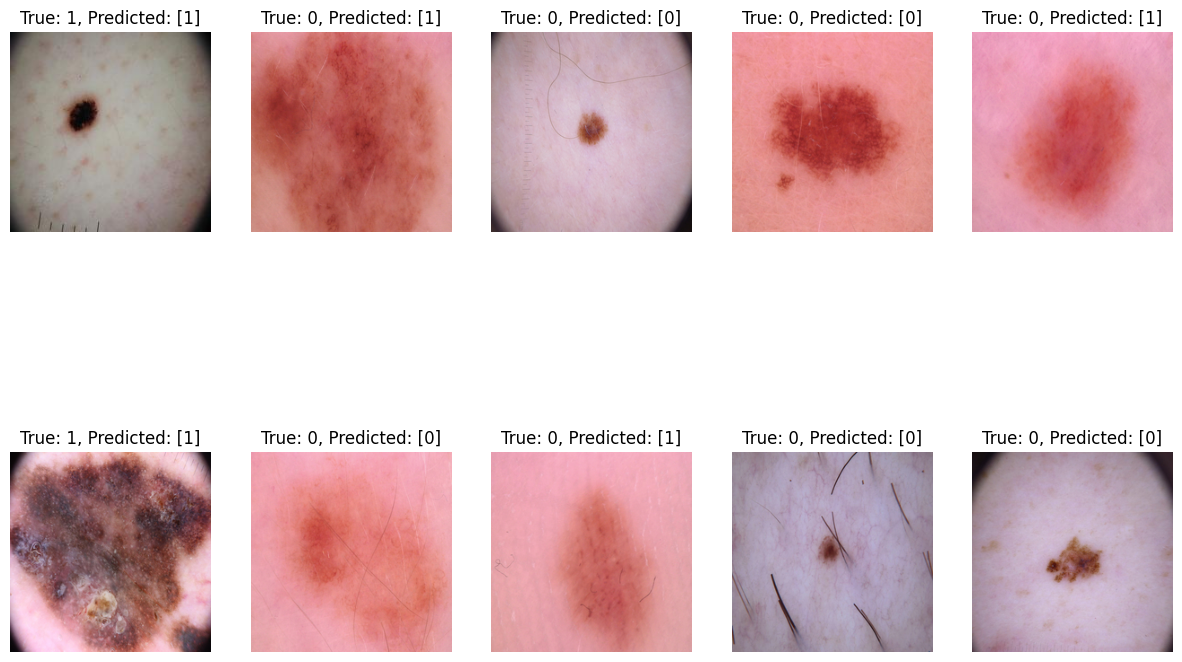

In [43]:
import numpy as np
import matplotlib.pyplot as plt

predictions = vgg16_model.predict(test_generator)

predicted_labels = (predictions > 0.5).astype(int)

filenames = test_generator.filenames

num_samples = 10  
random_indices = np.random.choice(len(filenames), num_samples, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    img_path = os.path.join(test_dir, filenames[idx])
    img = plt.imread(img_path)
    true_label = test_generator.labels[idx]
    predicted_label = predicted_labels[idx]

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')

plt.show()


visualization of training and validation loss and accurqacy of the vgg16 model

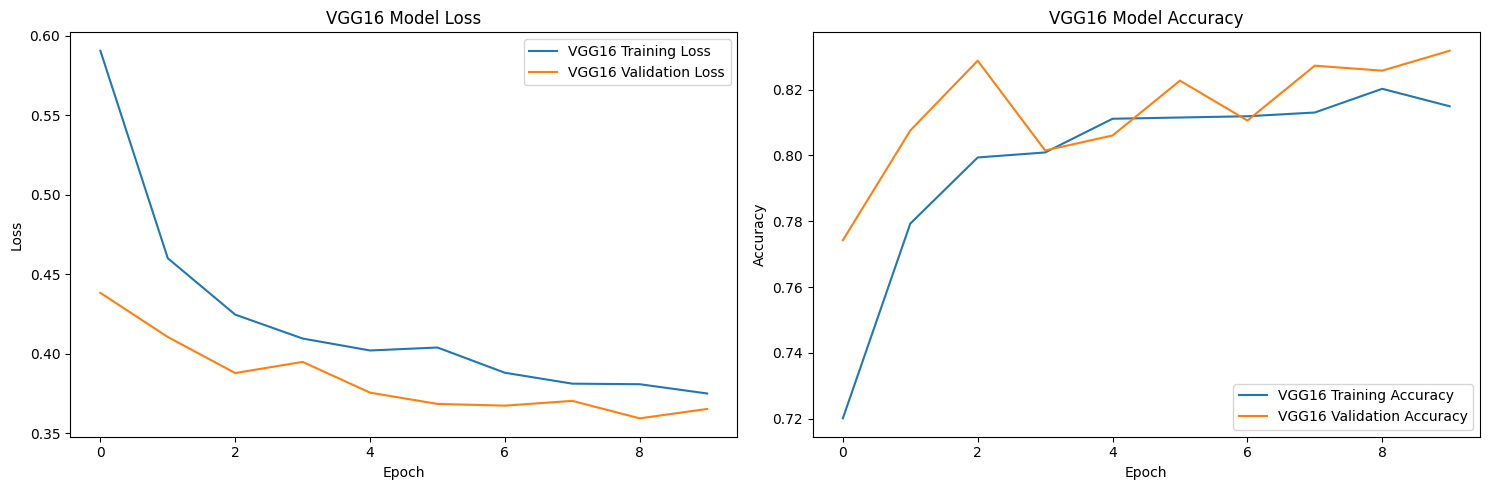

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='VGG16 Training Loss')
plt.plot(history.history['val_loss'], label='VGG16 Validation Loss')
plt.title('VGG16 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(history.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Visualizeing the loss and accuracy curves during training for both cnn and vgg to analyze
convergence patterns.

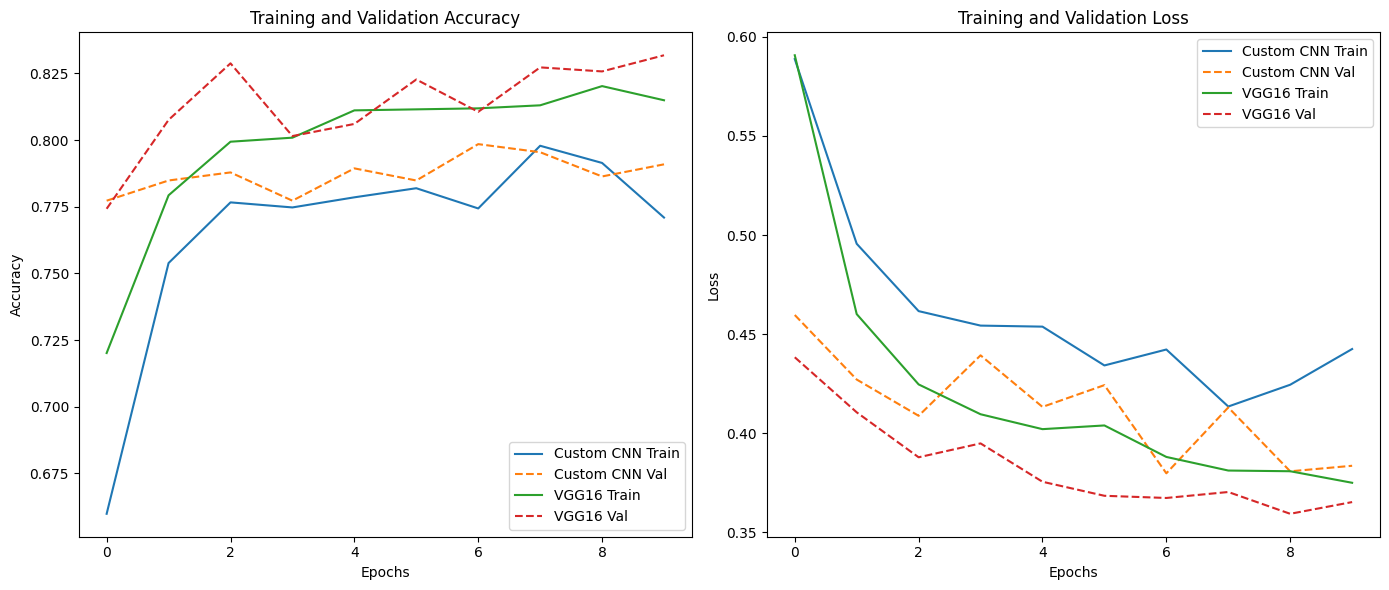

In [49]:
def plot_model_history(model_histories, labels, metric='accuracy'):
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    for history, label in zip(model_histories, labels):
        plt.plot(history.history[metric], label=f'{label} Train')
        plt.plot(history.history[f'val_{metric}'], '--', label=f'{label} Val')
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

    plt.subplot(1, 2, 2)
    for history, label in zip(model_histories, labels):
        plt.plot(history.history['loss'], label=f'{label} Train')
        plt.plot(history.history['val_loss'], '--', label=f'{label} Val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_model_history(
    [history_custom_cnn, history],
    ['Custom CNN', 'VGG16']
)

confusion matrices to compare classification performance and
error patterns.

Custom CNN Model Confusion Matrix


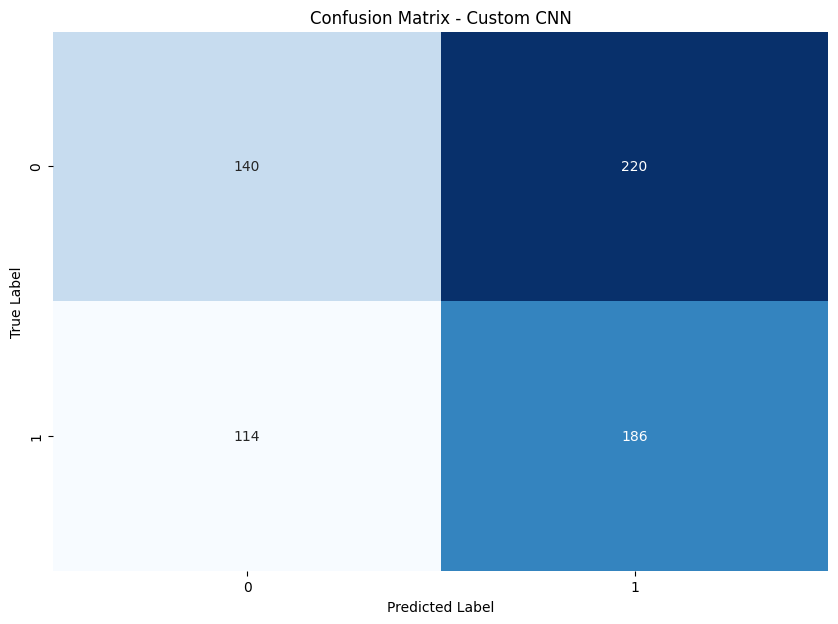

VGG16 Model Confusion Matrix


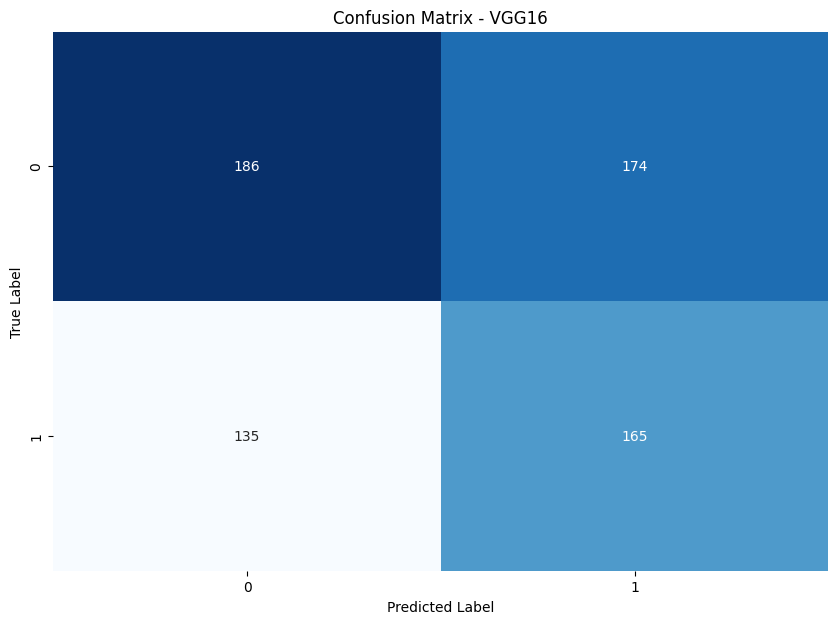

In [52]:
def plot_confusion_matrix(true_classes, predicted_classes, title='Confusion Matrix'):
    matrix = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

print("Custom CNN Model Confusion Matrix")
plot_confusion_matrix(true_labels_cnn, predicted_labels_cnn, 'Confusion Matrix - Custom CNN')

print("VGG16 Model Confusion Matrix")
plot_confusion_matrix(true_labels, predicted_labels, 'Confusion Matrix - VGG16')


ROC curves

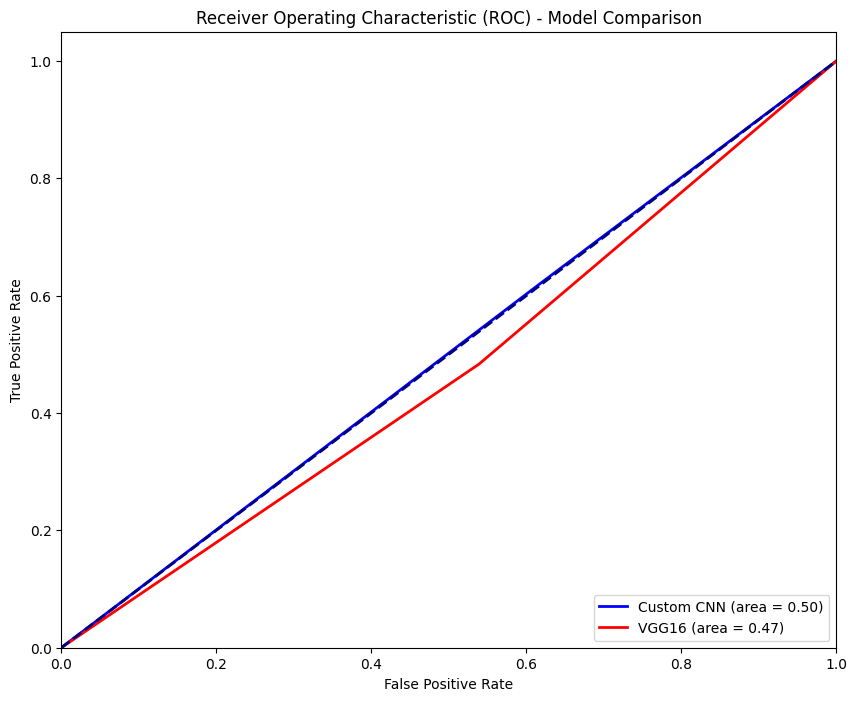

In [55]:
plt.figure(figsize=(10, 8))

plt.plot(fpr, tpr, color='blue', lw=2, label=f'Custom CNN (area = {roc_auc:.2f})')

plt.plot(fpr_vgg16, tpr_vgg16, color='red', lw=2, label=f'VGG16 (area = {roc_auc_vgg16:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Model Comparison')
plt.legend(loc="lower right")
plt.show()